#### Importing python packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflowjs as tfjs

tf.enable_eager_execution()

#### Loading the MNIST database

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Defining the model

In [3]:
HIDDEN_NEURONS = 32
DROPOUT_RATE = 0.2

In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(HIDDEN_NEURONS, activation='relu'),
                                    tf.keras.layers.Dropout(DROPOUT_RATE),
                                    tf.keras.layers.Dense(10, activation='softmax')])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Defining training

In [6]:
LEARNING_RATE = 0.0001

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [8]:
VALIDATION_SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 32

In [9]:
history = model.fit(x_train,
                    y_train,
                    validation_split=VALIDATION_SPLIT,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 62us/sample - loss: 1.1628 - acc: 0.6619 - val_loss: 0.5482 - val_acc: 0.8715
Epoch 2/10
48000/48000 [==============================] - 1s 30us/sample - loss: 0.5939 - acc: 0.8305 - val_loss: 0.3901 - val_acc: 0.9004
Epoch 3/10
48000/48000 [==============================] - 1s 30us/sample - loss: 0.4853 - acc: 0.8609 - val_loss: 0.3319 - val_acc: 0.9132
Epoch 4/10
48000/48000 [==============================] - 2s 32us/sample - loss: 0.4273 - acc: 0.8769 - val_loss: 0.2970 - val_acc: 0.9206
Epoch 5/10
48000/48000 [==============================] - 1s 31us/sample - loss: 0.3930 - acc: 0.8877 - val_loss: 0.2759 - val_acc: 0.9249
Epoch 6/10
48000/48000 [==============================] - 2s 31us/sample - loss: 0.3673 - acc: 0.8931 - val_loss: 0.2603 - val_acc: 0.9288
Epoch 7/10
48000/48000 [==============================] - 1s 31us/sample - loss: 0.3471 - acc: 0.8997 - val_loss: 0.

## Plotting training curves

In [10]:
def plot_learning_curves(history: tf.keras.callbacks.History):
    history = history.history
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

    ax1.title.set_text('Loss curves')
    ax1.plot(range(1, EPOCHS+1),
             history['loss'],
             label='loss')
    ax1.plot(range(1, EPOCHS+1),
             history['val_loss'],
             label='val_loss')
    ax1.legend()

    ax2.title.set_text('Accurracy curves')
    ax2.plot(range(1, EPOCHS+1),
             history['acc'],
             label='acc')
    ax2.plot(range(1, EPOCHS+1),
             history['val_acc'],
             label='val_acc')
    ax2.legend()

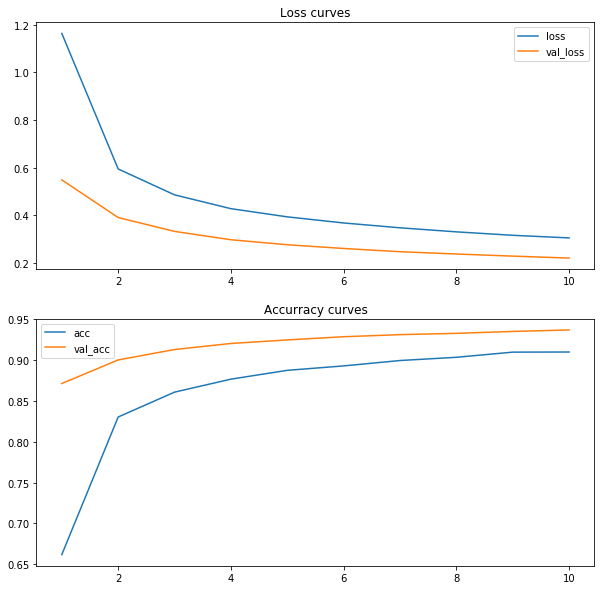

In [11]:
plot_learning_curves(history)

## Testing the model

#### Performance on training set (includes validation set)

In [12]:
model.evaluate(x_train, y_train, verbose=2)

60000/1 - 1s - loss: 0.1720 - acc: 0.9369


[0.22275777719219525, 0.93691665]

#### Performance on hold-out test set (should be similar to training)

In [13]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.1673 - acc: 0.9354


[0.22440857456326485, 0.9354]

## Saving the model for JS
#### Overrides model in the repository

In [14]:
tfjs.converters.save_keras_model(model, './model')